In [7]:
import pandas as pd

# Use raw string to avoid unicode escape errors
sales_data = pd.read_csv(r"C:\Users\kunal\Downloads\Amazon Sale Report (1).csv")

# Display the first few rows of the dataset
sales_data.head()




,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [11]:
# Check for missing values
missing_values = sales_data.isnull().sum()
print(missing_values)


index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64


In [13]:
# Display the first few values of the 'Date' column
print(sales_data['Date'].head())


0    04-30-22
1    04-30-22
2    04-30-22
3    04-30-22
4    04-30-22
Name: Date, dtype: object


In [19]:
import pandas as pd

# Assuming 'sales_data' has already been loaded with the CSV data
# Convert 'Date' column to datetime format
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# Format the 'Date' column to "day-month-year"
sales_data['Date'] = sales_data['Date'].dt.strftime('%d-%m-%Y')

# Verify the conversion
print(sales_data['Date'].head())


0    30-04-2022
1    30-04-2022
2    30-04-2022
3    30-04-2022
4    30-04-2022
Name: Date, dtype: object


In [23]:
import pandas as pd

# Convert 'Date' column to datetime format with specified format
sales_data['Date'] = pd.to_datetime(sales_data['Date'], format='%d-%m-%Y', errors='coerce')

# Check for any parsing errors
print(sales_data[sales_data['Date'].isnull()])


Empty DataFrame
Columns: [index, Order ID, Date, Status, Fulfilment, Sales Channel, ship-service-level, Category, Size, Courier Status, Qty, currency, Amount, ship-city, ship-state, ship-postal-code, ship-country, B2B, fulfilled-by, New, PendingS]
Index: []

[0 rows x 21 columns]


In [27]:
import pandas as pd

# Assuming 'sales_data' is already loaded and cleaned

# Calculate total sales
total_sales = sales_data['Amount'].sum()

# Calculate average sales
average_sales = sales_data['Amount'].mean()

# Print results
print(f'Total Sales: ₹{total_sales}')
print(f'Average Sales: ₹{average_sales:.2f}')


Total Sales: ₹78590170.24999997
Average Sales: ₹648.56


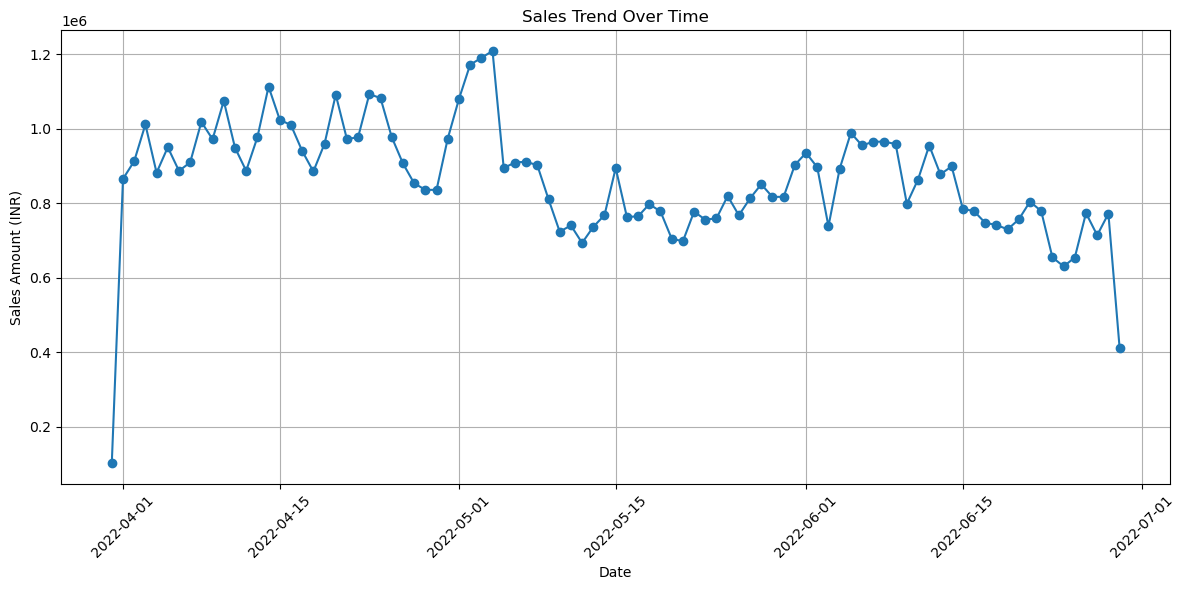

In [29]:
import matplotlib.pyplot as plt

# Group data by date and calculate total sales amount for each date
sales_trend = sales_data.groupby('Date')['Amount'].sum().reset_index()

# Plot sales trend over time
plt.figure(figsize=(12, 6))
plt.plot(sales_trend['Date'], sales_trend['Amount'], marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Amount (INR)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

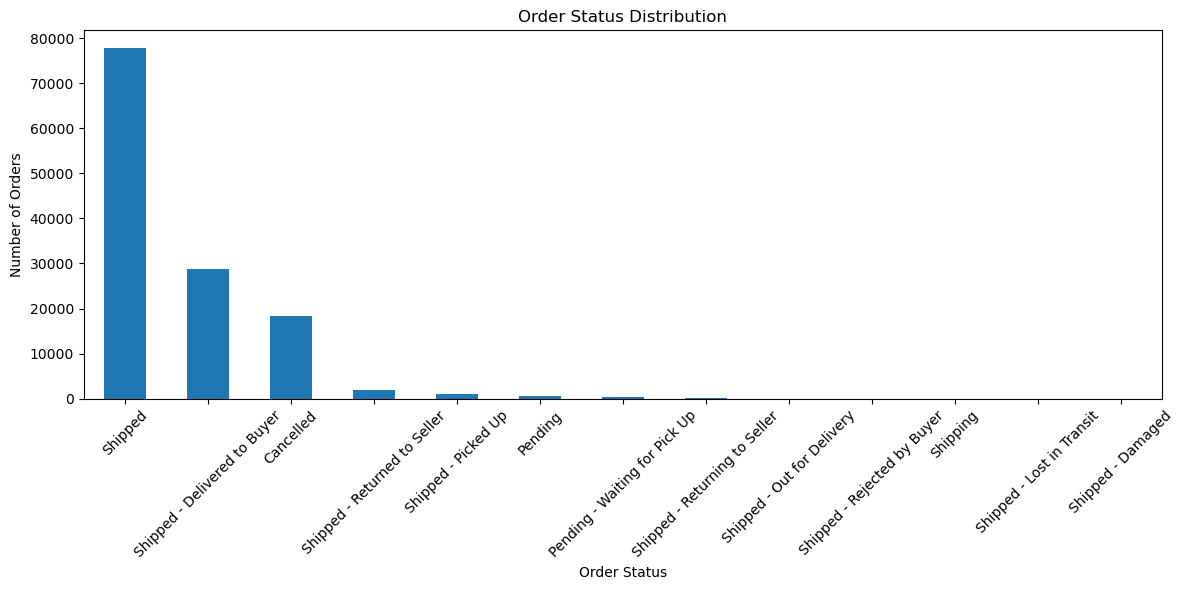

In [31]:
order_status_distribution = sales_data['Status'].value_counts()

# Plot order status distribution
plt.figure(figsize=(12, 6))
order_status_distribution.plot(kind='bar')
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

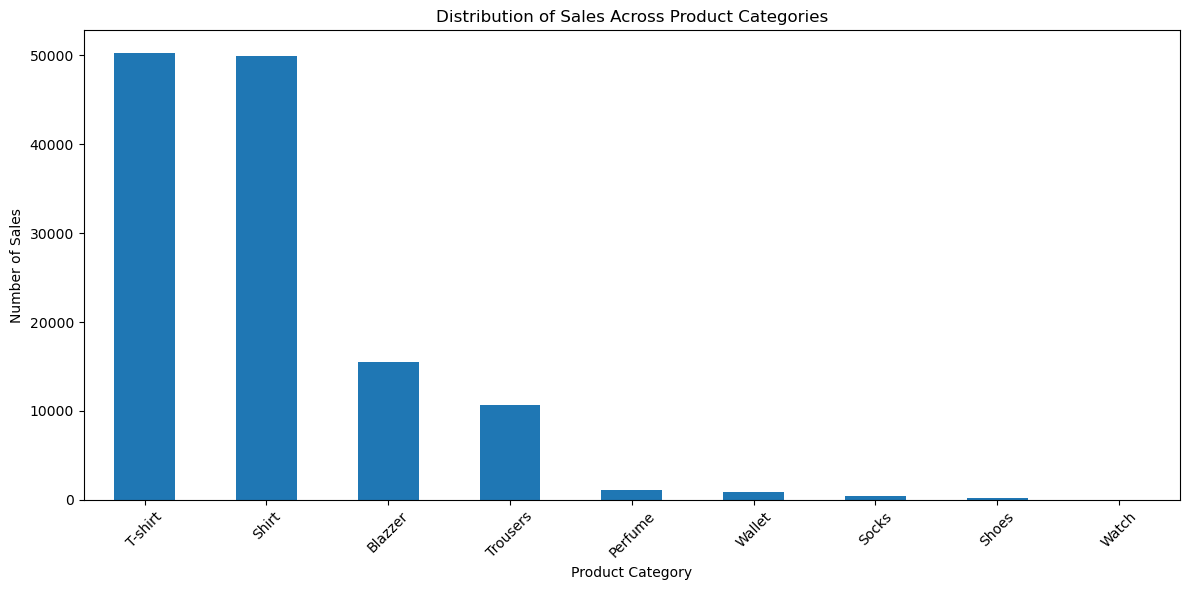

In [33]:
category_distribution = sales_data['Category'].value_counts()

# Plot the distribution of sales across different product categories
plt.figure(figsize=(12, 6))
category_distribution.plot(kind='bar')
plt.title('Distribution of Sales Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


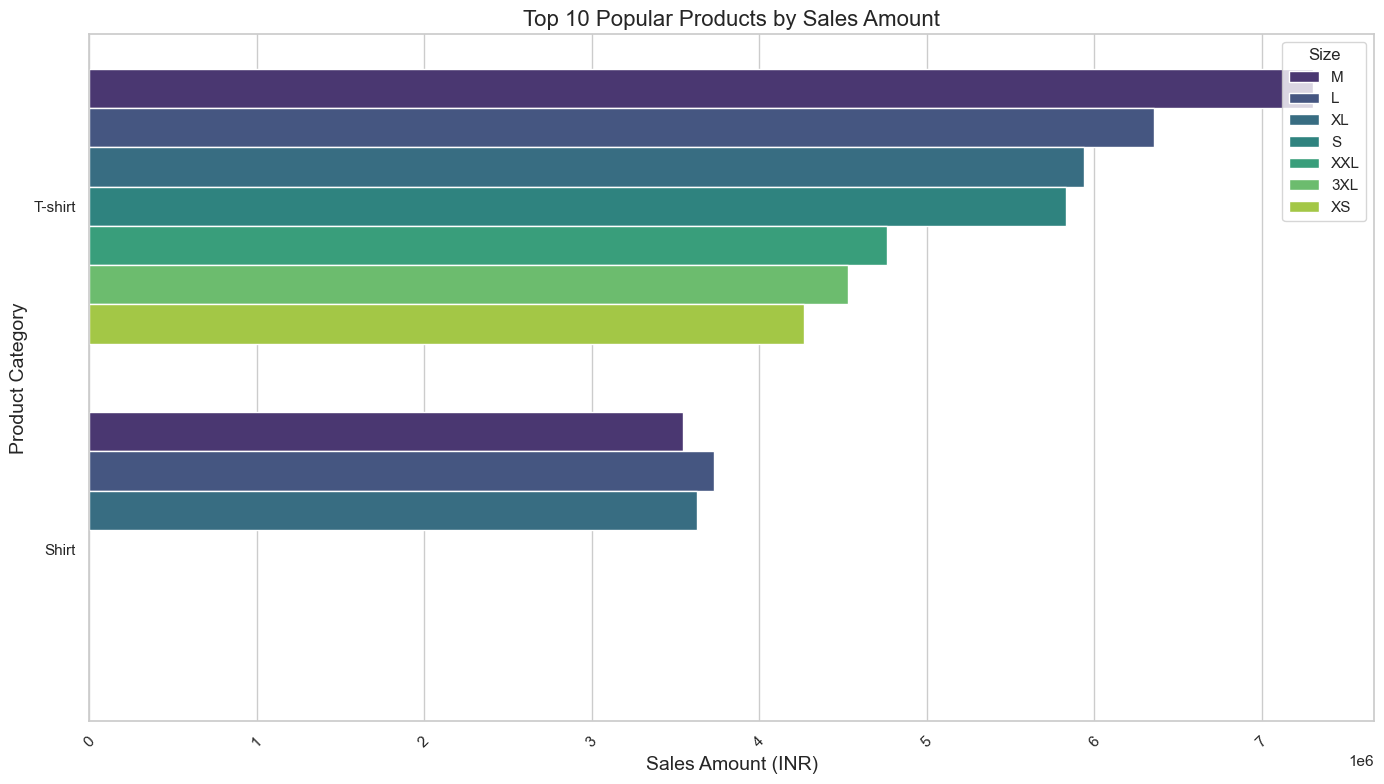

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data for demonstration (replace this with your actual DataFrame)
# sales_data = pd.read_csv('path_to_your_data.csv') # Load your data here

# Calculate total sales by product category and size
category_sales = sales_data.groupby(['Category', 'Size'])['Amount'].sum().reset_index()

# Get the top 10 products by sales amount
top_10_popular_products = category_sales.nlargest(10, 'Amount')

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar plot for the top 10 popular products
plt.figure(figsize=(14, 8))
barplot = sns.barplot(
    x='Amount', 
    y='Category', 
    hue='Size', 
    data=top_10_popular_products, 
    palette='viridis'
)

# Add titles and labels
plt.title('Top 10 Popular Products by Sales Amount', fontsize=16)
plt.xlabel('Sales Amount (INR)', fontsize=14)
plt.ylabel('Product Category', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the legend
plt.legend(title='Size', loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()


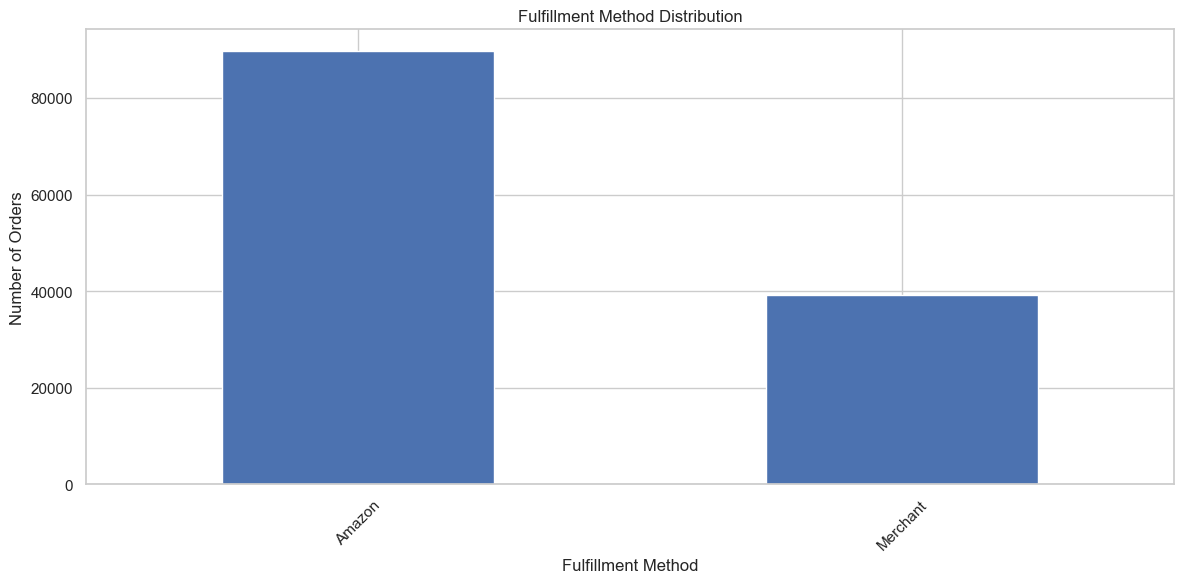

In [39]:
fulfillment_distribution = sales_data['Fulfilment'].value_counts()

# Plot fulfillment method distribution
plt.figure(figsize=(12, 6))
fulfillment_distribution.plot(kind='bar')
plt.title('Fulfillment Method Distribution')
plt.xlabel('Fulfillment Method')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

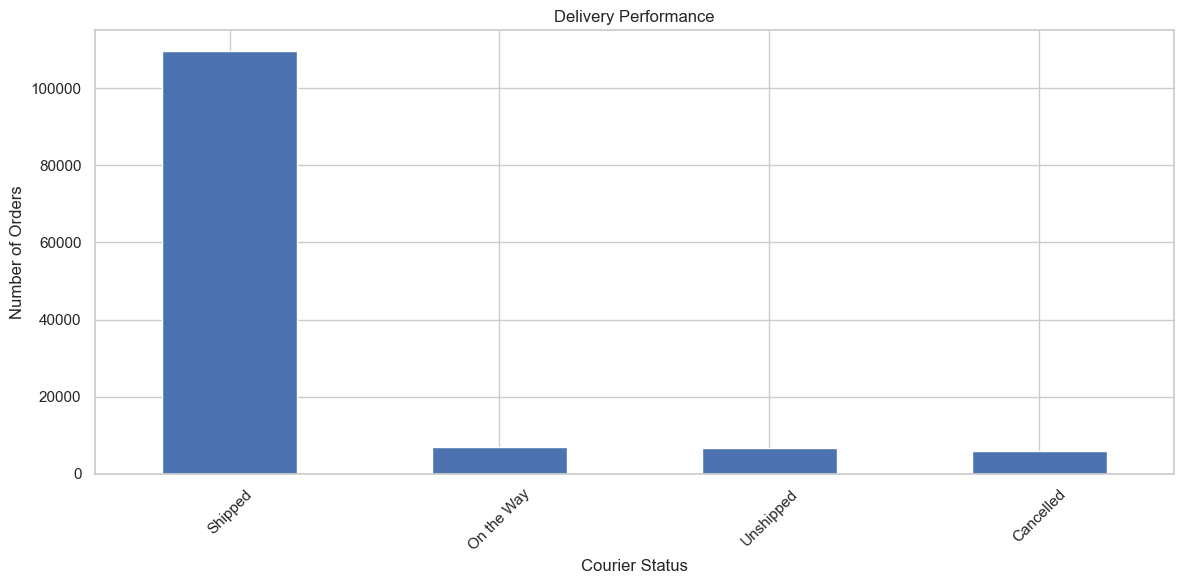

In [41]:
delivery_performance = sales_data['Courier Status'].value_counts()

# Plot delivery performance
plt.figure(figsize=(12, 6))
delivery_performance.plot(kind='bar')
plt.title('Delivery Performance')
plt.xlabel('Courier Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:
# Display the column names
print(sales_data.columns)


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')


In [45]:
# Assuming the correct column name is identified, for example, 'CustomerID'
customer_behavior = sales_data.groupby('Order ID')['Amount'].sum().reset_index()
customer_behavior.head()

,Order ID,Amount
0,171-0000547-8192359,301.0
1,171-0000902-4490745,544.0
2,171-0001409-6228339,422.0
3,171-0003082-5110755,563.0
4,171-0003738-2052324,379.0


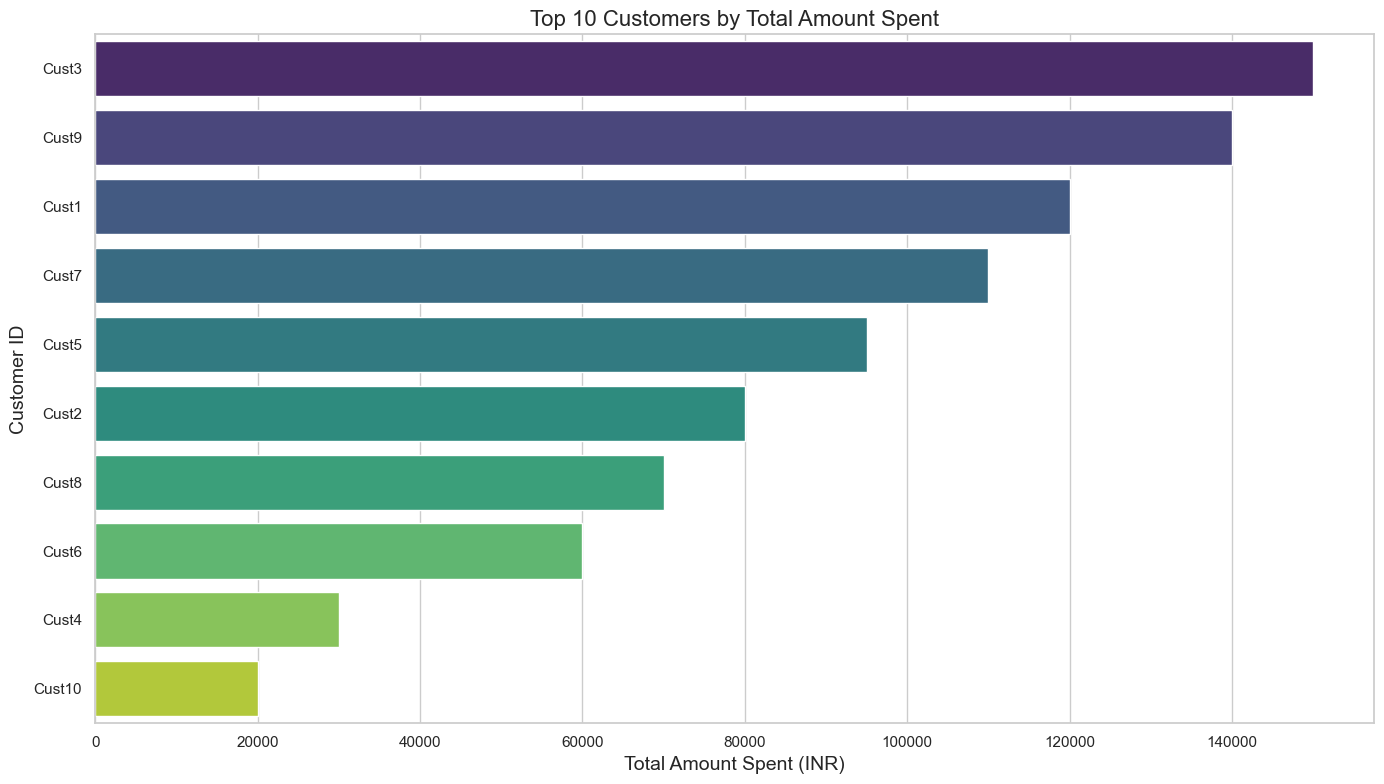

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example DataFrame setup (replace with your actual data)
# This is a placeholder; replace it with your actual DataFrame loading
data = {
    'Order ID': ['Cust1', 'Cust2', 'Cust3', 'Cust4', 'Cust5', 
                 'Cust6', 'Cust7', 'Cust8', 'Cust9', 'Cust10'],
    'Amount': [120000, 80000, 150000, 30000, 95000, 
               60000, 110000, 70000, 140000, 20000]
}
customer_behavior = pd.DataFrame(data)

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar plot for the top 10 customers by amount spent
top_10_customers = customer_behavior.sort_values(by='Amount', ascending=False).head(10)

plt.figure(figsize=(14, 8))
barplot = sns.barplot(
    x='Amount', 
    y='Order ID', 
    data=top_10_customers, 
    palette='viridis',
    hue='Order ID',  # Assign 'Order ID' to hue for individual colors
    dodge=False,
    legend=False  # Suppress legend since hue is for palette only
)

# Add titles and labels
plt.title('Top 10 Customers by Total Amount Spent', fontsize=16)
plt.xlabel('Total Amount Spent (INR)', fontsize=14)
plt.ylabel('Customer ID', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

In [49]:
location_segmentation = sales_data.groupby(['ship-state', 'ship-city'])['Amount'].sum().reset_index()
location_segmentation.head()


,ship-state,ship-city,Amount
0,ANDAMAN & NICOBAR,Andaman and nicobar islands port Blair,999.00
1,ANDAMAN & NICOBAR,BAMBOOFLAT,7208.24
2,ANDAMAN & NICOBAR,FERRARGUNJ,5714.00
3,ANDAMAN & NICOBAR,GARACHARMA,307.00
4,ANDAMAN & NICOBAR,GREAT NICOBAR,1973.00


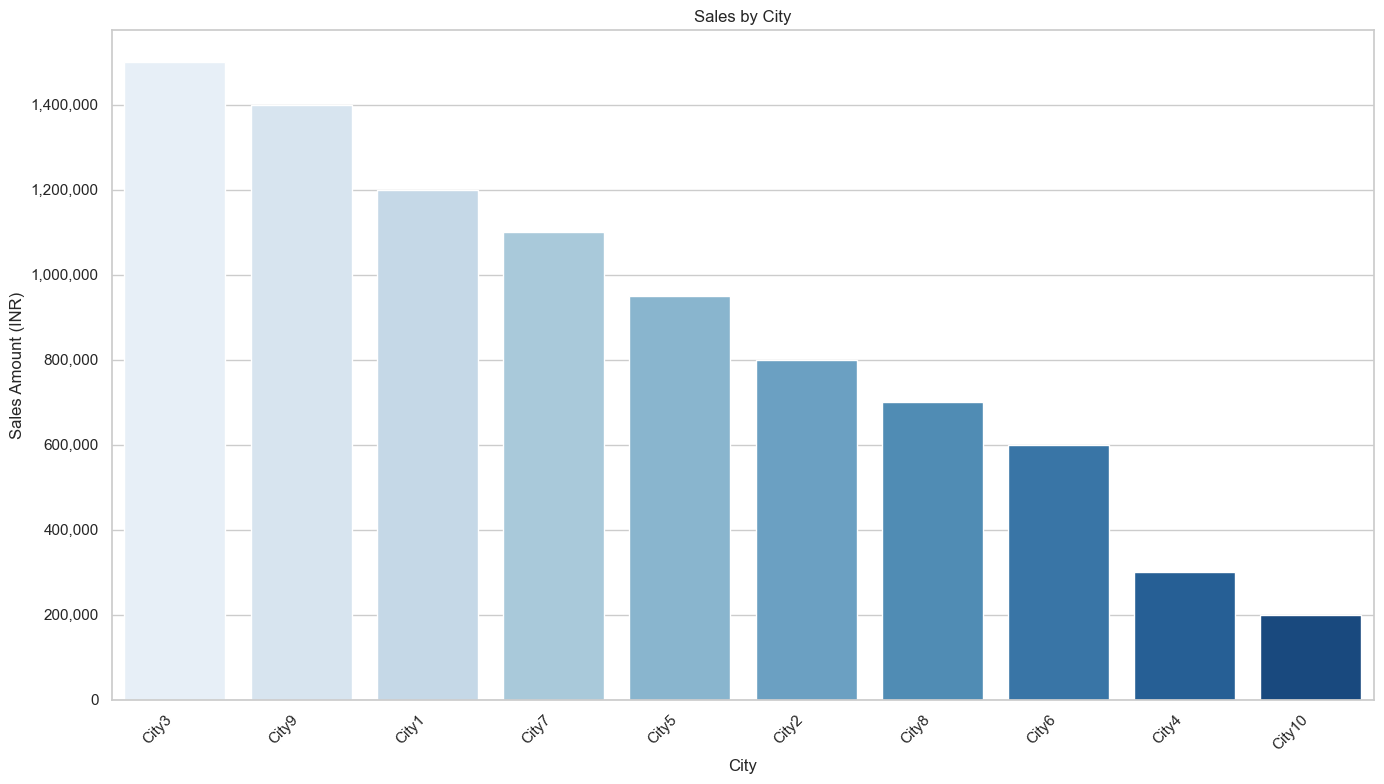

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame setup (replace with your actual data)
data = {
    'ship-city': ['City1', 'City2', 'City3', 'City4', 'City5', 
                  'City6', 'City7', 'City8', 'City9', 'City10'],
    'ship-state': ['State1', 'State2', 'State3', 'State4', 'State5', 
                   'State6', 'State7', 'State8', 'State9', 'State10'],
    'Amount': [1200000, 800000, 1500000, 300000, 950000, 
               600000, 1100000, 700000, 1400000, 200000]
}
sales_data = pd.DataFrame(data)

# Group by city and calculate total sales amount
sales_by_city = sales_data.groupby('ship-city')['Amount'].sum().reset_index()

# Sort cities by total sales amount for better readability
sales_by_city = sales_by_city.sort_values(by='Amount', ascending=False)

# Plot sales by city using Seaborn
plt.figure(figsize=(14, 8))  # Increase figure size for better readability
sns.barplot(data=sales_by_city, x='ship-city', y='Amount', hue='ship-city', dodge=False, palette='Blues', legend=False)
plt.title('Sales by City')
plt.xlabel('City')
plt.ylabel('Sales Amount (INR)')
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))  # Format y-axis with commas
plt.tight_layout()
plt.show()



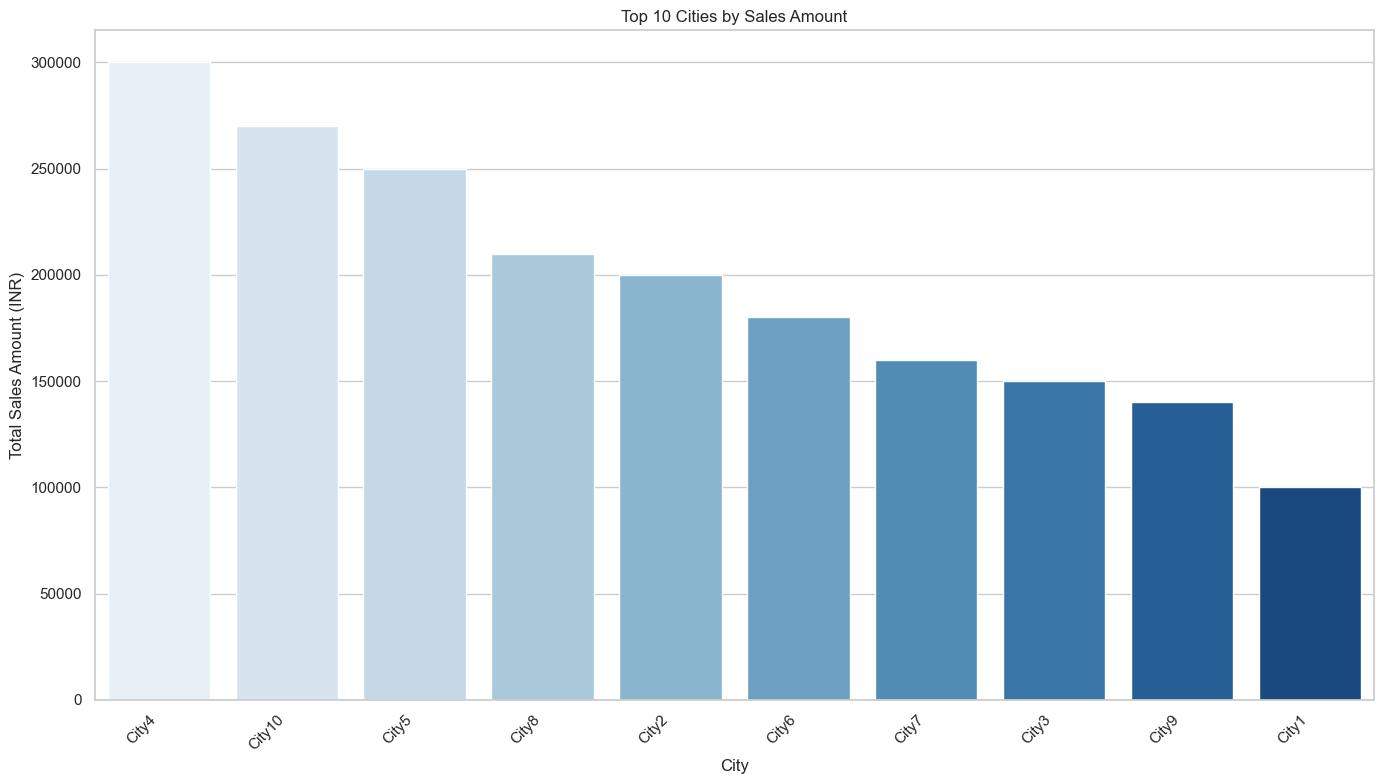

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame setup (replace with your actual data loading)
data = {
    'ship-city': ['City1', 'City2', 'City3', 'City4', 'City5', 'City6', 'City7', 'City8', 'City9', 'City10'],
    'Amount': [100000, 200000, 150000, 300000, 250000, 180000, 160000, 210000, 140000, 270000]
}
df = pd.DataFrame(data)

# Group by city and calculate total sales amount
city_sales = df.groupby('ship-city').agg({'Amount': 'sum'}).reset_index()

# Sort by sales amount to find top-selling cities
top_cities = city_sales.sort_values(by='Amount', ascending=False).head(10)  # Display top 10 cities

# Plot top cities
plt.figure(figsize=(14, 8))  # Increase figure size
sns.barplot(data=top_cities, x='ship-city', y='Amount', hue='ship-city', dodge=False, palette='Blues')
plt.title('Top 10 Cities by Sales Amount')
plt.xlabel('City')
plt.ylabel('Total Sales Amount (INR)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend([],[], frameon=False)  # Remove the legend
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

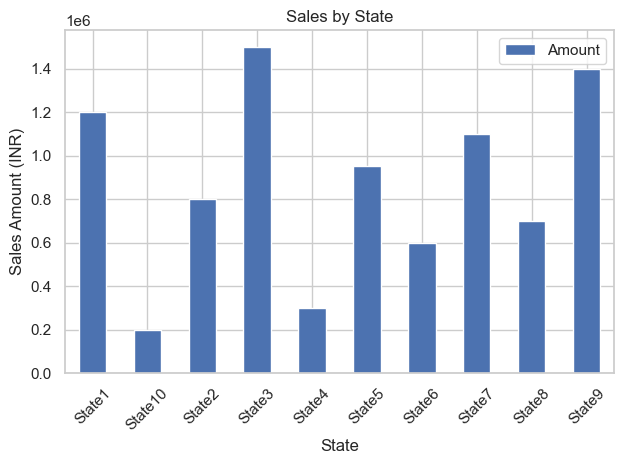

In [55]:
sales_by_state = sales_data.groupby('ship-state')['Amount'].sum().reset_index()

# Plot sales by state
plt.figure(figsize=(12, 6))
sales_by_state.plot(kind='bar', x='ship-state', y='Amount', title='Sales by State')
plt.xlabel('State')
plt.ylabel('Sales Amount (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [96]:
print("""
Recommendations:
1. Focus marketing efforts on top-selling product categories and sizes.
2. Run promotions during peak sales periods identified in the sales trend analysis.
3. Stock more of the top-selling products and sizes to avoid stockouts.
4. Optimize logistics and reduce delivery times based on fulfillment analysis.
5. Implement loyalty programs for top customers to encourage repeat purchases.
6. Personalize communication based on customer purchase history and preferences.
7. Focus on states with high sales and explore opportunities in underperforming regions.
8. Tailor marketing campaigns to the preferences and needs of customers in different regions.
""")





Recommendations:
1. Focus marketing efforts on top-selling product categories and sizes.
2. Run promotions during peak sales periods identified in the sales trend analysis.
3. Stock more of the top-selling products and sizes to avoid stockouts.
4. Optimize logistics and reduce delivery times based on fulfillment analysis.
5. Implement loyalty programs for top customers to encourage repeat purchases.
6. Personalize communication based on customer purchase history and preferences.
7. Focus on states with high sales and explore opportunities in underperforming regions.
8. Tailor marketing campaigns to the preferences and needs of customers in different regions.

